In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tools.calculos import calculate_FD_FDsa

In [3]:
f = "../data/cuernavaca-mayo-2025-09-22.csv"
cva = pd.read_csv(f,index_col=0,parse_dates=True)
columnas = cva.columns
cva.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2025-01-15 00:00:00-06:00 to 2025-01-15 23:59:00-06:00
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       1440 non-null   float64
 1   DeltaTn  1440 non-null   float64
 2   Ta       1440 non-null   float64
 3   Ig       1440 non-null   float64
 4   Ib       1440 non-null   float64
 5   Id       1440 non-null   float64
 6   Is       1440 non-null   float64
 7   Tsa_1    1440 non-null   float64
 8   Ti_1     1440 non-null   float64
dtypes: float64(9)
memory usage: 112.5 KB


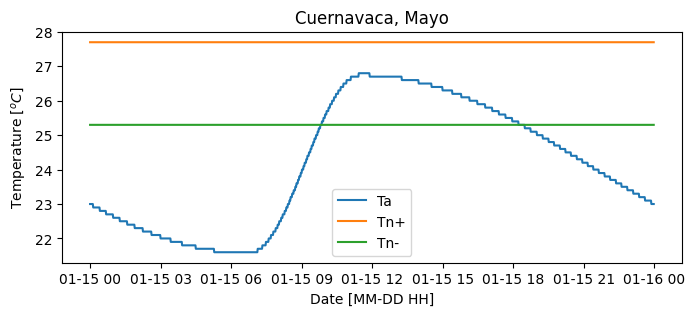

In [4]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(cva.Ta,label="Ta")
ax.plot(cva.Tn + cva.DeltaTn ,label="Tn+")
ax.plot(cva.Tn - cva.DeltaTn ,label="Tn-")

ax.set_xlabel("Date [MM-DD HH]")
ax.set_ylabel("Temperature [$^oC$]")
ax.set_title("Cuernavaca, Mayo")
ax.legend()

fig.savefig("../figs/Ta.pdf")
plt.show()

In [5]:
# cva["Ti"] = 13 + cva.Ta*cva.Ig/13. *0.01

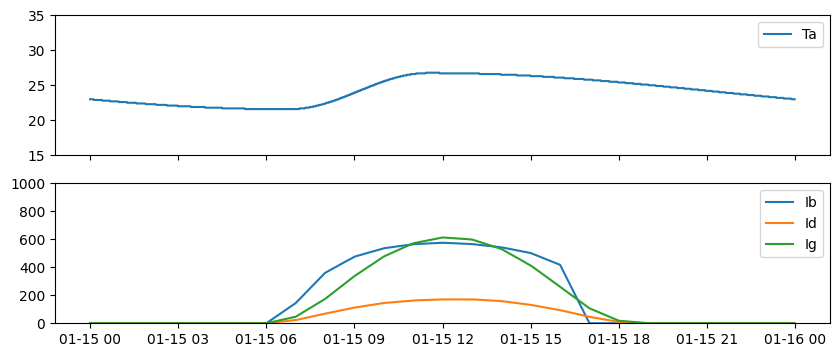

In [6]:
fig, ax = plt.subplots(2,1,figsize=(10,4),sharex=True)

ax[0].plot(cva.Ta,label="Ta")

ax[1].plot(cva.Ib,label="Ib")
ax[1].plot(cva.Id,label="Id")
ax[1].plot(cva.Ig,label="Ig")

ax[0].legend()
ax[1].legend()
ax[0].set_ylim(15,35)
ax[1].set_ylim(0,1000)
plt.show()

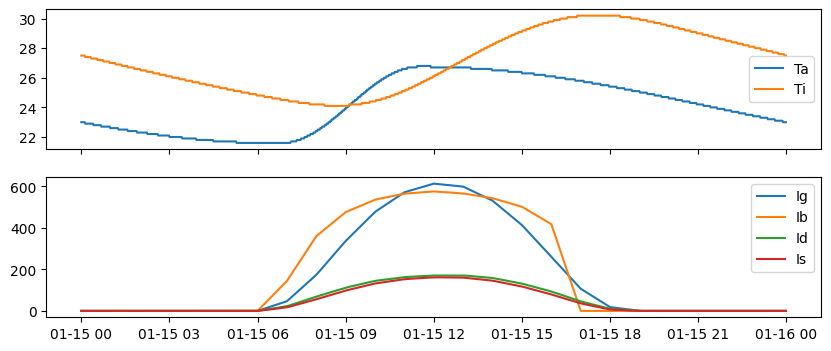

In [7]:
Is = [columna for columna in columnas if "I" in columna]

fig, axs = plt.subplots(2,1,figsize=(10,4),sharex=True)

axs[0].plot(cva.Ta,label="Ta")
axs[0].plot(cva.Ti_1,label="Ti")

for I in Is:
    axs[1].plot(cva[I],label=I)

for ax in axs:
    ax.legend()

plt.show()

In [8]:
cva.columns

Index(['Tn', 'DeltaTn', 'Ta', 'Ig', 'Ib', 'Id', 'Is', 'Tsa_1', 'Ti_1'], dtype='object')

## Factor de decremento diario
$$ 
FD = \frac{Ti_{max} - Ti_{min}}{Ta_{max} - Ta_{min}}
$$

## Factor de decremento sol-aire diario
$$ 
FD = \frac{Ti_{max} - Ti_{min}}{Tsa_{max} - Tsa_{min}}
$$


In [9]:
FD = (cva.Ti_1.resample("D").max() - cva.Ti_1.resample("D").min())/(cva.Ta.resample("D").max() - cva.Ta.resample("D").min())

In [10]:
FDsa =(cva.Ti_1.resample("D").max() - cva.Ti_1.resample("D").min())/(cva.Tsa_1.resample("D").max() - cva.Tsa_1.resample("D").min()) 
FDsa

Time
2025-01-15 00:00:00-06:00    0.403974
Freq: D, dtype: float64

In [11]:
# def calculate_FD_FDsa(cva:pd.DataFrame) -> tuple[float,float]:
    
#         FD = (cva.Ti_1.resample("D").max() - cva.Ti_1.resample("D").min())/(cva.Ta.resample("D").max() - cva.Ta.resample("D").min())
#         FDsa =(cva.Ti_1.resample("D").max() - cva.Ti_1.resample("D").min())/(cva.Tsa_1.resample("D").max() - cva.Tsa_1.resample("D").min()) 
#         return FD, FDsa

In [12]:
FD, FDsa = calculate_FD_FDsa(cva)

In [13]:
FD

Time
2025-01-15 00:00:00-06:00    1.173077
Freq: D, dtype: float64

In [14]:
FDsa

Time
2025-01-15 00:00:00-06:00    0.403974
Freq: D, dtype: float64